In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [70]:
df = pd.read_csv('C:/Users/User/Downloads/breast-cancer.csv')

In [71]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [73]:
df.drop(['id'], axis = 1, inplace = True)

In [72]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [74]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [9]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [10]:
df.describe().round()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
count      569.0        569.0         569.0           569.0      569.0   
mean         0.0         14.0          19.0            92.0      655.0   
std          0.0          4.0           4.0            24.0      352.0   
min          0.0          7.0          10.0            44.0      144.0   
25%          0.0         12.0          16.0            75.0      420.0   
50%          0.0         13.0          19.0            86.0      551.0   
75%          1.0         16.0          22.0           104.0      783.0   
max          1.0         28.0          39.0           188.0     2501.0   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count            569.0             569.0           569.0                569.0   
mean               0.0               0.0             0.0                  0.0   
std                0.0               0.0             0.0                  0.0   
min                0.0               0.0             0.0                  0.0   
25%                0.0               0.0             0.0                  0.0   
50%                0.0               0.0             0.0                  0.0   
75%                0.0               0.0             0.0                  0.0   
max                0.0               0.0             0.0                  0.0   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count          569.0  ...         569.0          569.0            569.0   
mean             0.0  ...          16.0           26.0            107.0   
std              0.0  ...           5.0            6.0             34.0   
min              0.0  ...           8.0           12.0             50.0   
25%              0.0  ...          13.0           21.0             84.0   
50%              0.0  ...          15.0           25.0             98.0   
75%              0.0  ...          19.0           30.0            125.0   
max              0.0  ...          36.0           50.0            251.0   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count       569.0             569.0              569.0            569.0   
mean        881.0               0.0                0.0              0.0   
std         569.0               0.0                0.0              0.0   
min         185.0               0.0                0.0              0.0   
25%         515.0               0.0                0.0              0.0   
50%         686.0               0.0                0.0              0.0   
75%        1084.0               0.0                0.0              0.0   
max        4254.0               0.0                1.0              1.0   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count                 569.0           569.0                    569.0  
mean                    0.0             0.0                      0.0  
std                     0.0             0.0                      0.0  
min                     0.0             0.0                      0.0  
25%                     0.0             0.0                      0.0  
50%                     0.0             0.0                      0.0  
75%                     0.0             0.0                      0.0  
max                     0.0             1.0                      0.0  

[8 rows x 31 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
# checking for null values

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df.duplicated().sum()

0

<AxesSubplot:>

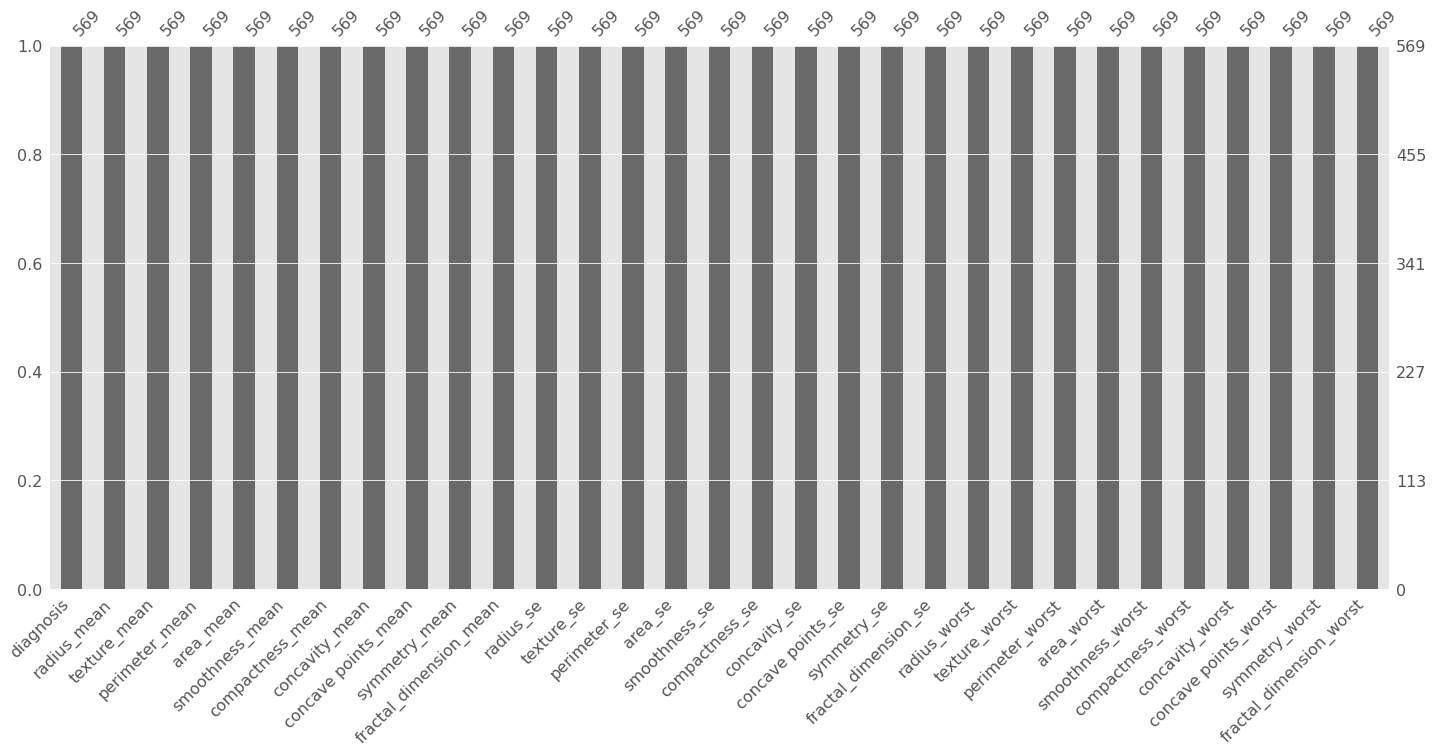

In [14]:
# visualizing null values

msno.bar(df)

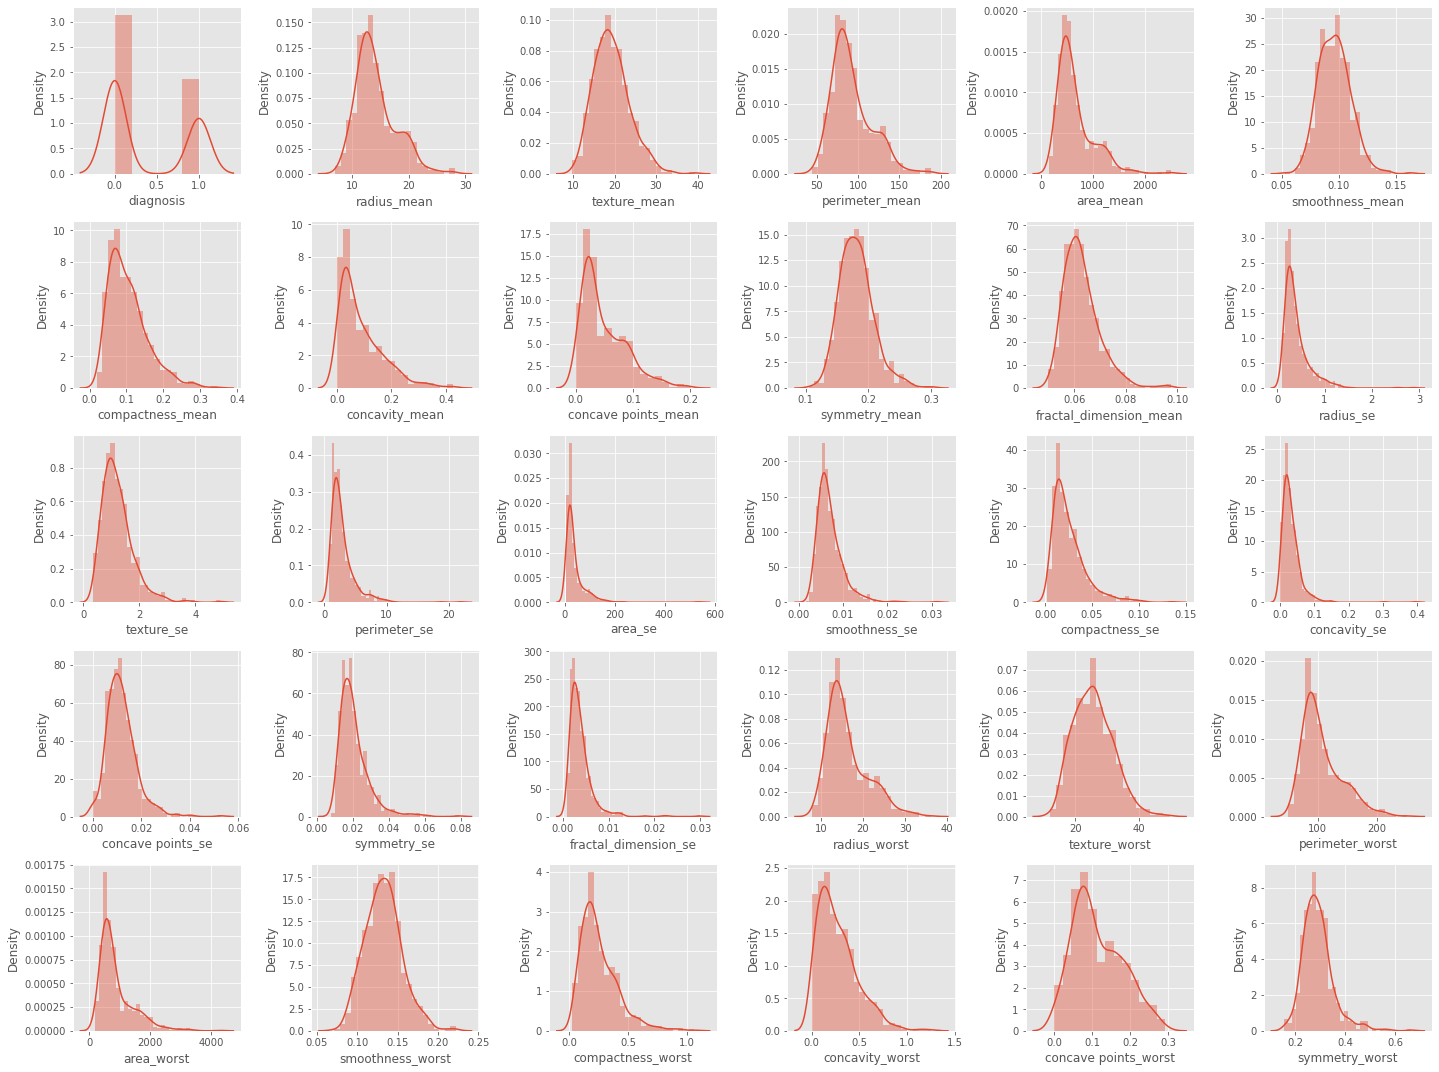

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

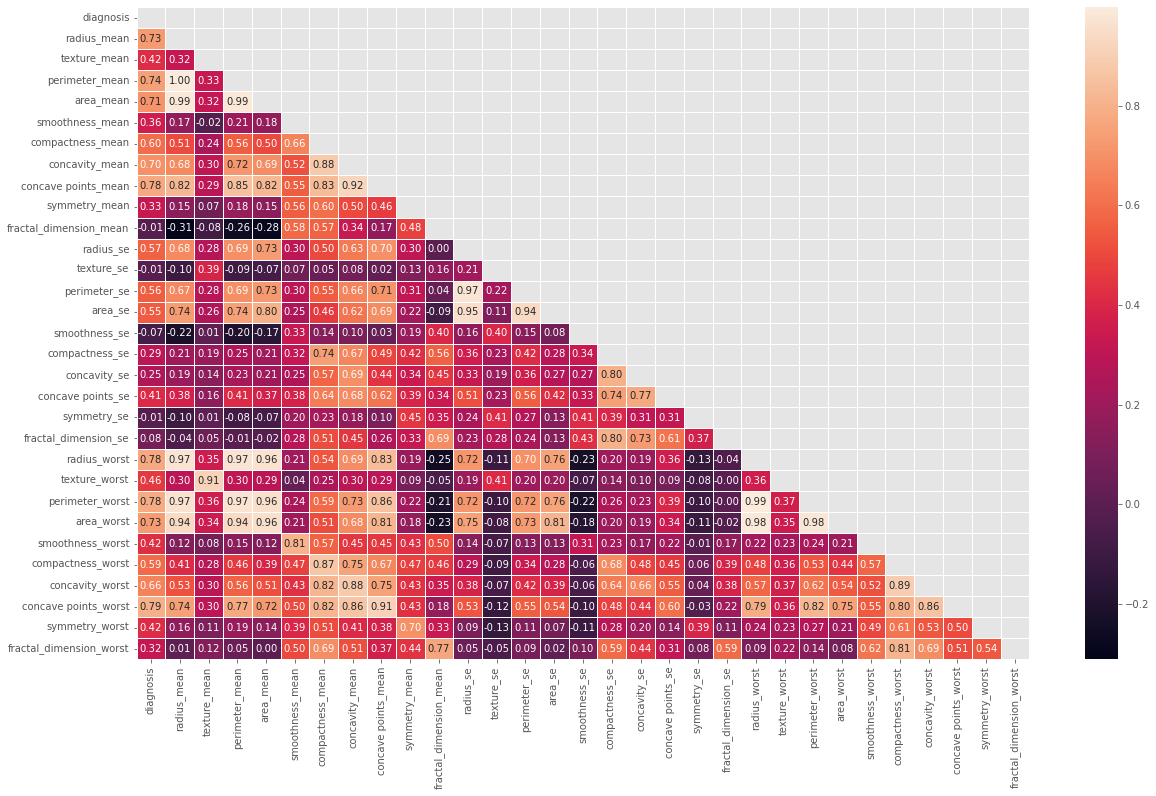

In [16]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [76]:
cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['diagnosis'],ascending=False)

In [77]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.diagnosis

The most relevant features (numeric) for the target are :


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [ ]:
#We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [78]:
# 2 datasets
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [22]:
import plotly.graph_objs as go
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)


In [21]:
import plotly.offline as py

In [23]:
#positive correlated features
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

In [24]:
#uncorrelated features
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

In [25]:
#negative features
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

In [80]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [81]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [138]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [140]:
features=df[['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

In [139]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [94]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [145]:
y_train.shape

(398,)

In [95]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [97]:
# model predictions

y_pred = log_reg.predict(X_test)

In [98]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9899497487437185
0.9590643274853801


In [99]:
# confusion matrix

cm=confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  5  58]]


In [35]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [100]:
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [91]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [103]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

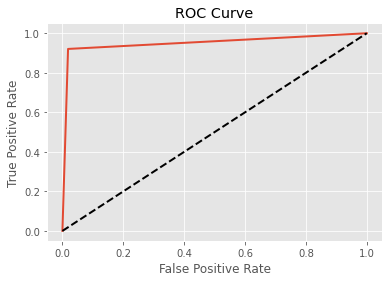

In [105]:
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_pred)
plot_roc()

In [108]:
#calculate AUC of model
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

#print AUC score
print(auc)

0.9510582010582009


In [36]:
#Gives the count of 1 and 0
#1 reprents Breast Cancer
#0 represents No Breast Cancer
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [109]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [110]:
#Training the SVM Model
model.fit(X_train, y_train)

SVC(kernel='linear')

In [117]:
y_pred = model.predict(X_test)

In [119]:
model.support_vectors_

array([[ 7.42414905e-01, -6.44303555e-01, -5.31714466e-01,
        -3.99277477e-01,  7.20013340e-03, -7.97725319e-01,
         2.69448970e-01, -4.25662068e-01, -8.84818744e-01,
        -6.70856370e-01, -3.60041513e-01,  2.75877666e-02,
        -4.88608612e-01, -6.75351654e-01,  1.02373698e+00,
        -3.27325775e-01, -7.11178773e-01, -5.36094794e-01,
        -2.08960741e-01,  1.97827636e-01, -3.29378789e-02,
        -8.11175406e-01],
       [-8.34567646e-01, -1.58644884e-01, -7.25172201e-01,
        -9.82597597e-02, -3.42530879e-01, -8.86743201e-01,
        -1.33119083e+00, -4.16218255e-01,  1.43633280e-01,
        -7.77319116e-01, -2.28649320e-01,  4.49452683e-01,
        -8.52092770e-01, -4.42652565e-01, -1.26626282e+00,
         5.68629747e-02,  1.25038670e-01, -7.64167845e-01,
        -3.82529960e-01,  3.12147237e-01, -9.34141404e-01,
        -6.36652828e-01],
       [-7.96337766e-01,  8.14830942e-01,  9.69643133e-01,
         5.20626539e-01,  4.81835079e-01,  9.30097160e-01,
    

In [146]:
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))


Accuracy with SVM: 97.66%


<AxesSubplot:>

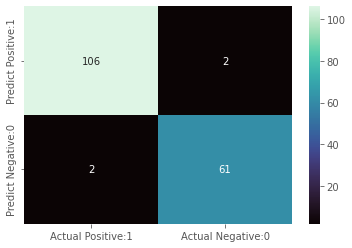

In [147]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

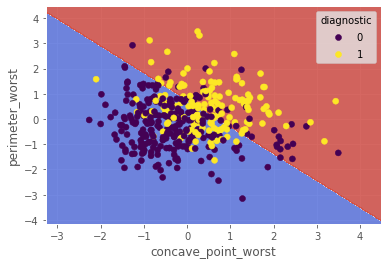

In [150]:
h = .02  # mesh step    
C = 1.0  # Regularisation
clf = svm.SVC(kernel='linear', C=C).fit(X_train[:,:2], y_train) # Linear Kernel


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
scat=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
legend1 = plt.legend(*scat.legend_elements(),
                    loc="upper right", title="diagnostic")
plt.xlabel('concave_point_worst')
plt.ylabel('perimeter_worst')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [151]:
from mpl_toolkits.mplot3d import Axes3D

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, model.predict(X_train)))

model_acc = accuracy_score(y_test, model.predict(X_test))
print(model_acc)

0.9899497487437185
0.9766081871345029


In [113]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [43]:
#Predicting System
data =(4,7.76,24.54,47.92,181.0,0.05263,0.0436, 0.00000,0.00000,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0.000, 0.000,9.456)
#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape = data_array.reshape(1, -1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)

if(prediction[0] == 1):
    print('Have Breast Cancer')
else:
    print('Breast Cancer Free')

Have Breast Cancer


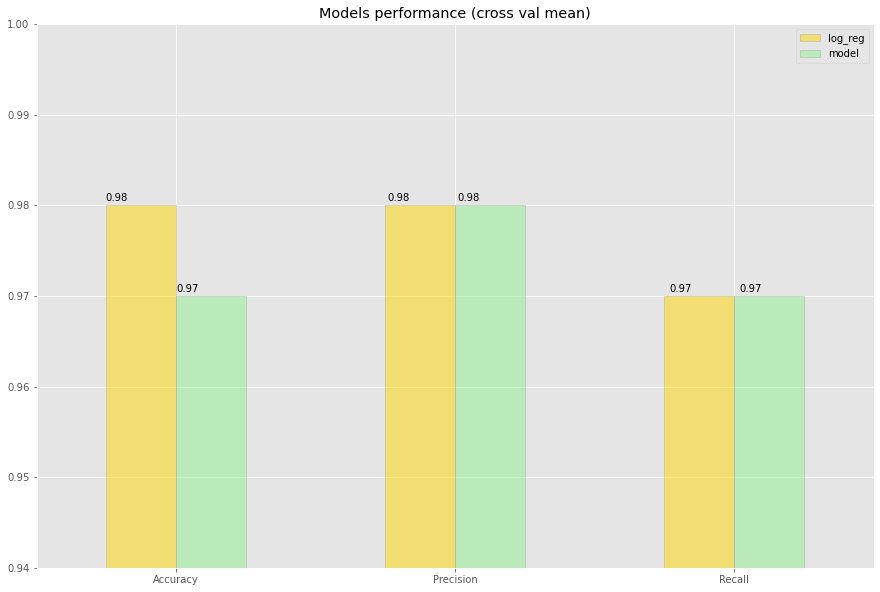

In [158]:
models_metrics = {'log_reg': [0.98, 0.98, 0.97], 
                 'model': [0.97, 0.98, 0.97]
                 
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

In [141]:
#from sklearn.decomposition import PCA